In [2]:
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from neupy import algorithms
import pandas as pd
from scipy.optimize import dual_annealing

# GRNN for all three output variables

In [13]:
class GRNN():
    def __init__(self, nn, scaler_x, scaler_y):
        self.nn = nn
        self.scaler_x = scaler_x
        self.scaler_y = scaler_y

def fit(X_, Y_):
    grnns = []
    for i in range(Y_.shape[1]):
        scaler_x = MinMaxScaler(feature_range=(0, 1))
        scaler_y = MinMaxScaler(feature_range=(0, 1))

        X = scaler_x.fit_transform(X_)
        Y = scaler_y.fit_transform(np.expand_dims(Y_[:, i], -1))

        x_train = X[:, :]
        x_test = X[120:, :]

        y_train = np.expand_dims(Y[:, :], -1)
        y_test = np.expand_dims(Y[120:, :], -1)
        nw = algorithms.GRNN(std=0.05, verbose=False)
        nw.train(x_train, y_train)
        
        grnns.append(GRNN(nw, scaler_x, scaler_y))
    return grnns

def calculate_error(grnns, X_, Y_):
    mses = []
    preds = []
    for i, grnn in enumerate(grnns):
        X = grnn.scaler_x.transform(X_)
        pred = grnn.nn.predict(X)
        pred= np.squeeze(pred, -1)
        pred = grnn.scaler_y.inverse_transform(pred)
        print(pred.shape)
        preds.append(pred)
        mse = np.mean((np.expand_dims(Y_[:, i], -1) - pred) ** 2)
        mses.append(mse)
    return mses, preds


X_ = pd.read_csv(r'C:\Users\Saravanan\Desktop\maybe\paper work\syncrel\x_2.csv', header = None).values#[:, :]
Y_ = pd.read_csv(r'C:\Users\Saravanan\Desktop\maybe\paper work\syncrel\y_2.csv', header = None).values#[:, 0]

grnns = fit(X_, Y_)
x_test = X_#[120:, :]
y_test = Y_#[120:, :]
mses, preds = calculate_error(grnns, x_test, y_test)
actual = y_test
pred = np.concatenate(preds, axis=1)
print(pred.shape)
result = pd.DataFrame(np.concatenate([actual, pred, x_test], axis=1))
print(result)
for mse in mses:
    print(mse)

(131, 1)
(131, 1)
(131, 1)
(131, 3)
            0          1         2         3          4         5         6  \
0    0.186646  91.275503  7.320161  0.186134  91.271309  7.323088  3.025501   
1    0.158204  91.042365  7.482942  0.159645  91.046228  7.481893  3.025501   
2    0.211328  91.027887  7.586356  0.208210  91.024594  7.587640  3.025501   
3    0.088008  90.827035  7.762458  0.090466  90.831337  7.760603  3.025501   
4    0.103785  90.869638  7.833571  0.104329  90.864248  7.835591  3.025501   
..        ...        ...       ...       ...        ...       ...       ...   
126  0.111707  90.667962  8.103729  0.112633  90.662257  8.105416  3.053684   
127  0.126629  90.389588  8.281747  0.126670  90.394668  8.279894  3.053684   
128  0.143911  90.398711  8.354857  0.144213  90.393209  8.356409  3.053684   
129  0.178287  90.096464  8.515829  0.177740  90.103711  8.514215  3.053684   
130  0.181692  90.204390  8.585448  0.181630  90.202449  8.584196  3.053684   

            7  

In [14]:
result.to_csv("grnn_result_1.csv")

In [3]:
actual = pd.read_csv("grnn_result_1.csv").values[1:, 0:3].astype(np.float32)
pred = pd.read_csv("grnn_result_1.csv").values[1:, 3:6].astype(np.float32)

metrics_df = pd.DataFrame(columns=['metric', 'tripple', 'efficiency', 'tav'])

from sklearn.metrics import r2_score
# R^2
print("R2 tripple", r2_score(actual[:, 0], pred[:, 0]))
print("R2 efficiency", r2_score(actual[:, 1], pred[:, 1]))
print("R2 tav", r2_score(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'R2',
            'tripple': r2_score(actual[:, 0], pred[:, 0]),
            'efficiency': r2_score(actual[:, 1], pred[:, 1]),
            'tav': r2_score(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

def relative_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / np.sum((y_pred - np.mean(y_true))**2)

print("RSE tripple", relative_squared_error(actual[:, 0], pred[:, 0]))
print("RSE efficiency", relative_squared_error(actual[:, 1], pred[:, 1]))
print("RSE tav", relative_squared_error(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'RSE',
            'tripple': relative_squared_error(actual[:, 0], pred[:, 0]),
            'efficiency': relative_squared_error(actual[:, 1], pred[:, 1]),
            'tav': relative_squared_error(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

from sklearn.metrics import mean_absolute_error
print("MAE tripple", mean_absolute_error(actual[:, 0], pred[:, 0]))
print("MAE efficiency", mean_absolute_error(actual[:, 1], pred[:, 1]))
print("MAE tav", mean_absolute_error(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'MAE',
            'tripple': mean_absolute_error(actual[:, 0], pred[:, 0]),
            'efficiency': mean_absolute_error(actual[:, 1], pred[:, 1]),
            'tav': mean_absolute_error(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

def relative_abs_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_pred - np.mean(y_true)))

print("RAE tripple", relative_abs_error(actual[:, 0], pred[:, 0]))
print("RAE efficiency", relative_abs_error(actual[:, 1], pred[:, 1]))
print("RAE tav", relative_abs_error(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'RAE',
            'tripple': relative_abs_error(actual[:, 0], pred[:, 0]),
            'efficiency': relative_abs_error(actual[:, 1], pred[:, 1]),
            'tav': relative_abs_error(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

from sklearn.metrics import mean_squared_error
print("MSE tripple", mean_squared_error(actual[:, 0], pred[:, 0]))
print("MSE efficiency", mean_squared_error(actual[:, 1], pred[:, 1]))
print("MSE tav", mean_squared_error(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'MSE',
            'tripple': mean_squared_error(actual[:, 0], pred[:, 0]),
            'efficiency': mean_squared_error(actual[:, 1], pred[:, 1]),
            'tav': mean_squared_error(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

import math
print("RMSE tripple", math.sqrt(mean_squared_error(actual[:, 0], pred[:, 0])))
print("RMSE efficiency", math.sqrt(mean_squared_error(actual[:, 1], pred[:, 1])))
print("RMSE tav", math.sqrt(mean_squared_error(actual[:, 2], pred[:, 2])))
metrics_df = metrics_df.append({'metric': 'RMSE',
            'tripple': math.sqrt(mean_squared_error(actual[:, 0], pred[:, 0])),
            'efficiency': math.sqrt(mean_squared_error(actual[:, 1], pred[:, 1])),
            'tav': math.sqrt(mean_squared_error(actual[:, 2], pred[:, 2]))}, ignore_index=True)
print()

def nrmse_mean(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

print("NRMSE-mean tripple", nrmse_mean(actual[:, 0], pred[:, 0]))
print("NRMSE-mean efficiency", nrmse_mean(actual[:, 1], pred[:, 1]))
print("NRMSE-mean tav", nrmse_mean(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'NRMSE-mean',
            'tripple': nrmse_mean(actual[:, 0], pred[:, 0]),
            'efficiency': nrmse_mean(actual[:, 1], pred[:, 1]),
            'tav': nrmse_mean(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

def nrmse_min_max(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred)) / (np.max(y_true) - np.min(y_true))

print("NRMSE-min_max tripple", nrmse_min_max(actual[:, 0], pred[:, 0]))
print("NRMSE-min_max efficiency", nrmse_min_max(actual[:, 1], pred[:, 1]))
print("NRMSE-min_max tav", nrmse_min_max(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'NRMSE-min_max',
            'tripple': nrmse_min_max(actual[:, 0], pred[:, 0]),
            'efficiency': nrmse_min_max(actual[:, 1], pred[:, 1]),
            'tav': nrmse_min_max(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

def nrmse_sd(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred)) / np.std(y_true)

print("NRMSE-sd tripple", nrmse_sd(actual[:, 0], pred[:, 0]))
print("NRMSE-sd efficiency", nrmse_sd(actual[:, 1], pred[:, 1]))
print("NRMSE-sd tav", nrmse_sd(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'NRMSE-sd',
            'tripple': nrmse_sd(actual[:, 0], pred[:, 0]),
            'efficiency': nrmse_sd(actual[:, 1], pred[:, 1]),
            'tav': nrmse_sd(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

def nrmse_iq(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred)) / (np.percentile(y_true, 75, interpolation = 'midpoint') - np.percentile(y_true, 25, interpolation = 'midpoint'))

print("NRMSE-iq tripple", nrmse_iq(actual[:, 0], pred[:, 0]))
print("NRMSE-iq efficiency", nrmse_iq(actual[:, 1], pred[:, 1]))
print("NRMSE-iq tav", nrmse_iq(actual[:, 2], pred[:, 2]))
metrics_df = metrics_df.append({'metric': 'NRMSE-iq',
            'tripple': nrmse_iq(actual[:, 0], pred[:, 0]),
            'efficiency': nrmse_iq(actual[:, 1], pred[:, 1]),
            'tav': nrmse_iq(actual[:, 2], pred[:, 2])}, ignore_index=True)
print()

print(metrics_df)
metrics_df.to_csv("grnn_metrics.csv")

R2 tripple 0.9936234842729689
R2 efficiency 0.9997601863008612
R2 tav 0.999732323338853

RSE tripple 0.0067254608
RSE efficiency 0.00024158746
RSE tav 0.00026867355

MAE tripple 0.001649163
MAE efficiency 0.0049133883
MAE tav 0.0029388203

RAE tripple 0.048766572
RAE efficiency 0.015488359
RAE tav 0.0081070075

MSE tripple 1.1205445e-05
MSE efficiency 3.3616492e-05
MSE tav 4.9607374e-05

RMSE tripple 0.0033474534999911936
RMSE efficiency 0.0057979731067324975
RMSE tav 0.007043250209393189

NRMSE-mean tripple 0.021334166432859628
NRMSE-mean efficiency 6.38732025843759e-05
NRMSE-mean tav 0.0008645412189252095

NRMSE-min_max tripple 0.017025940600393218
NRMSE-min_max efficiency 0.004048154409814423
NRMSE-min_max tav 0.003997783405845269

NRMSE-sd tripple 0.07985308676855181
NRMSE-sd efficiency 0.015485920130683796
NRMSE-sd tav 0.016360828109733532

NRMSE-iq tripple 0.05320431355890856
NRMSE-iq efficiency 0.009813112064378628
NRMSE-iq tav 0.01020852880278508

          metric   tripple  ef

In [5]:
class Objective(object):
    def __init__(self, grnns, xmin, xmax):
        self.grnns = grnns
        self.xmin = xmin
        self.xmax = xmax
    
    def __call__(self, X): # simple addition
        
        if not (np.all(X <= self.xmax) and np.all(X >= self.xmin)):
            return 10000
        tripple = 0
        eff = 1
        tav = 2
        value = 0
        X = np.expand_dims(X, 0)
        for i, grnn in enumerate(self.grnns):
            x_scaled = grnn.scaler_x.transform(X)
            pred = grnn.nn.predict(x_scaled)
            pred = np.squeeze(pred, -1)
            pred = grnn.scaler_y.inverse_transform(pred)
            if i == tav: # increase
                value += 100 - (((pred-7.3135) / (9.0753-7.3135)) * 100)
            elif i == eff: # increase
                value += 100 - (((pred-90.0915) / (91.5237-90.0915)) * 100)
            elif i == tripple: # decrease
                value += (((pred-0.0793) / (0.2759-0.0793)) * 100)
        return value[0][0]

df = pd.DataFrame(columns = ['f', 'context', 'x'])
def print_fun(x, f, context):
    global df
#     if accepted == 1:
#         print("at minimum %.4f accepted %d" % (f, int(accepted)))
#     if f < 10000:
#         print("at minimum %.4f accepted %d" % (f, int(accepted)))
#     print("at minimum %.4f accepted %d" % (f, int(accepted)))
    df = df.append(pd.DataFrame([[f, context, x]], columns = ['f', 'context', 'x']))

# xmin=[2.985700615, 4.152054319, 5.20306143, 2.6, 1.458841307, 1.247463957, 10.7643, 24.5952, 36.6826, 0.45]
# xmax=[3.994173672, 5.229702309, 6.362200008, 6.528583919, 3.133207987, 2.437445577, 13.3, 25.7294, 38.85875, 0.55]
xmin=[2.985700615, 4.1556724, 5.20306143, 2.6, 1.458841307, 1.247463957, 10.7643, 24.5952, 36.6826, 0.45, 2, 3, 5]
xmax=[3.994173672, 5.229702309, 6.362200008, 6.528583919, 3.133207987, 2.437445577, 13.3, 25.7294, 38.85875, 0.55, 3.396079904, 5.990883651, 9.356113776]

func = Objective(grnns, xmin, xmax)

dual_annealing(func, bounds=list(zip(xmin, xmax)), callback=print_fun, maxiter=500)

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neupy\algorithms\rbfn\grnn.py:156: RuntimeWarning: invalid value encountered in true_divide
  return (dot(self.y_train.T, ratios) / ratios.sum(axis=0)).T
c:\users\saravanan\appdata\local\programs\python\python36\lib\site-packages\neup

     fun: 95.8627988165028
 message: ['Maximum number of iteration reached']
    nfev: 13701
    nhev: 0
     nit: 500
    njev: 0
  status: 0
 success: True
       x: array([ 3.29822478,  4.5566175 ,  5.22240332,  5.27863787,  1.71196061,
        2.06641765, 13.22923687, 25.17489084, 37.21376104,  0.51813499,
        2.10310896,  4.28368799,  9.31272446])

In [4]:
%matplotlib notebook
accepted_df = df[df['context'] == True]
accepted_df
df

,f,context,x
0,115.143022,0,"[3.97493168120906, 4.3220222075651975, 5.36084..."
0,100.354919,0,"[3.2990802324041963, 4.764327654621997, 5.8039..."
0,100.354919,0,"[3.8946398428345974, 4.764327654621997, 5.8039..."
0,100.354919,0,"[3.8946398428345974, 4.878679078280285, 5.8039..."
0,100.354919,0,"[3.8946398428345974, 4.878679078280285, 5.6787..."
0,100.354919,0,"[3.8946398428345974, 4.878679078280285, 5.6787..."
0,98.588451,1,"[3.8946398428345974, 4.878679078280285, 5.6787..."
0,98.588451,0,"[3.8946398428345974, 4.878679078280285, 5.6787..."
0,98.588451,0,"[3.8946398428345974, 4.878679078280285, 5.6787..."
0,98.588451,1,"[3.8946398428345974, 4.878679078280285, 5.6787..."


<IPython.core.display.Javascript object>


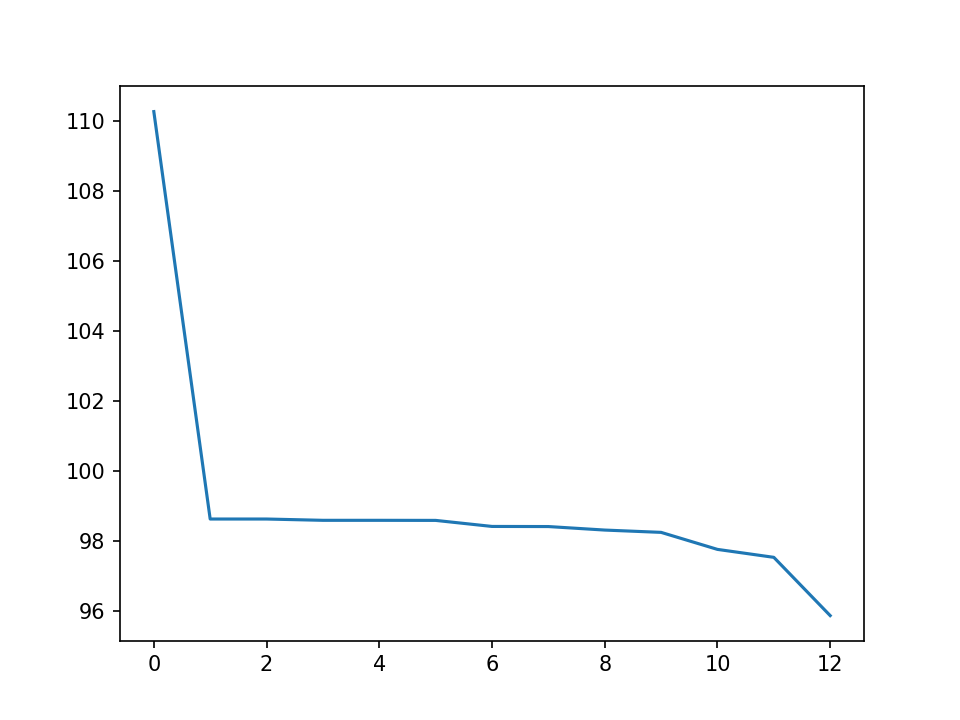

In [10]:
import matplotlib.pyplot as plt
# plt.plot(list(range(accepted_df.shape[0])), accepted_df['f'])
plt.plot(list(range(df.shape[0])), df['f'])

In [11]:
import datetime

x = datetime.datetime.now()
# 'basin_hopping_{:02.0f}{:02.0f}_{:02.0f}{:02.0f}{:02.0f}.csv'.format(x.date, x.month, x.hour, x.minute. x.second)
df.to_csv('dual_annealing_result_1.csv')

In [3]:
def predict(grnns, X):
    tav = 0
    eff = 1
    tripple = 2
    X = np.expand_dims(X, 0)
    for i, grnn in enumerate(grnns):
        x_scaled = grnn.scaler_x.transform(X)
        pred = grnn.nn.predict(x_scaled)
        pred = np.squeeze(pred, -1)
        if i == tav:
            print('Tav', grnn.scaler_y.inverse_transform(pred)[0][0])
        elif i == eff:
            print('eff', grnn.scaler_y.inverse_transform(pred)[0][0])
        elif i == tripple:
            print('tripple', grnn.scaler_y.inverse_transform(pred)[0][0])

predict(grnns, [ 3.82391584,  4.99270051,  6.22498233,  3.95470324,  2.76852117,
        1.35385582, 13.04861864, 24.86095019, 36.87936206,  0.5181342 ])

7.1077705140099
0.9018056528757201
9.311122885157783
